# **Dimensionality Reduction**

## PCA 
Principal Component Analysis en esta seccion del libro se describe toda la teoría y las implementaciones son similares a los libros 



## KernelPCA

In [24]:
from sklearn.decomposition import KernelPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)



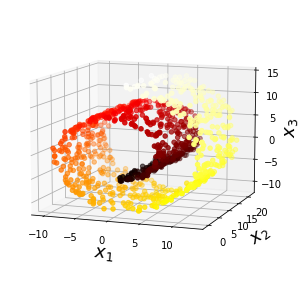

In [25]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

**Code to generate Figure 8–10. Swiss roll reduced to 2D using kPCA with various kernels:**

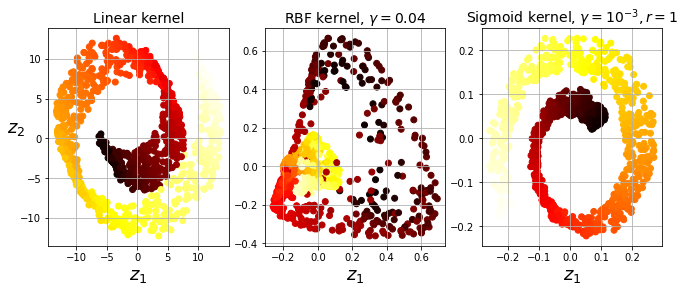

In [26]:
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001,
                    coef0=1, fit_inverse_transform=True)





plt.figure(figsize=(11, 4))
for subplot, pca, title in (
        (131, lin_pca, "Linear kernel"),
        (132, rbf_pca, "RBF kernel, $\gamma=0.04$"),
        (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):

    X_reduced = pca.fit_transform(X)
  

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()


**Selecting a Kernel and Tuning Hyperparameters**
El siguiente código crea una
tuberia en dos pasos, primero reduciendo la dimensionalidad a dos
dimensiones utilizando kPCA, y luego aplicando la Regresión Logística
para la clasificación. A continuación, utiliza GridSearchCV para encontrar el
mejor kernel y valor gamma para kPCA con el fin de obtener la mejor
precisión de clasificación al final de la tubería

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

y = t > 6.9

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="lbfgs"))
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [28]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


Otro enfoque, esta vez totalmente no supervisado, consiste en seleccionar el
núcleo y los hiperparámetros que produzcan el menor error de
reconstrucción. 

In [29]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576616

# Locally Lineal Embidding(LLE)

In [31]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [32]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

**Unrolled Swiss roll using LLE:**

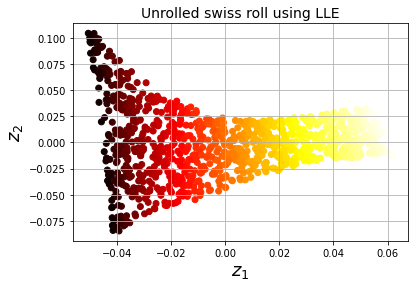

In [35]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
# plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()